In [1]:
import os 
os.chdir("..")
import numpy as np
import math
import scipy.io as sio
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import init_load_board as ib
import init_simple_mdp as imdp

import function_board as fb
import function_tool as ft

def get_gaussian(x_val,y_val,error_multiplier,player_index=7):
  
  result_dir = fb.data_parameter_dir + '/grid_full'
  if not os.path.isdir(result_dir):
      os.makedirs(result_dir)
  player_parameter = sio.loadmat('./ALL_Model_Fits.mat')
  
  ## 1mm-width grid of 341*341 aiming locations (a sqaure enclosing the circle dart board)
  [xindex, yindex, xgrid, ygrid, grid_num] = fb.get_1mm_grid()

  xi = np.where(xgrid==x_val)[0][0]
  yi = np.where(xgrid==y_val)[0][0]

  ## select the proper Gaussian distribution according to the area to which the aiming location belongs
  mu = [xgrid[xi], ygrid[yi]]
  score, multiplier = fb.get_score_and_multiplier(mu)
  if (score==60 and multiplier==3): ##triple 20
      covariance_matrix = player_parameter['ModelFit_T20'][0, player_index][2] * error_multiplier
  elif (score==57 and multiplier==3): ##triple 19
      covariance_matrix = player_parameter['ModelFit_T19'][0, player_index][2] * error_multiplier
  elif (score==54 and multiplier==3): ##triple 18
      covariance_matrix = player_parameter['ModelFit_T18'][0, player_index][2] * error_multiplier
  elif (score==51 and multiplier==3): ##triple 17
      covariance_matrix = player_parameter['ModelFit_T17'][0, player_index][2] * error_multiplier
  elif (score==50 and multiplier==2): ##double bull
      covariance_matrix = player_parameter['ModelFit_B50'][0, player_index][2] * error_multiplier
  else:
      covariance_matrix = player_parameter['ModelFit_All_Doubles'][0, player_index][2] * error_multiplier
  
  return mu,covariance_matrix

def plot_gaussian(x_val,y_val,error_multiplier,player_index=7,xlim=(-200,200),ylim=(-200,200),figsize = (8,8),ax=None,title=''):
  
  mu,covariance_matrix = get_gaussian(x_val,y_val,error_multiplier,player_index=player_index)
  rv = multivariate_normal(mu, covariance_matrix)
  
  x, y = np.mgrid[-200:200:1, -200:200:1]
  pos = np.dstack((x, y))
  
  axes = ib.plot_basic_board(xlim=xlim,ylim=ylim,figsize = figsize,axes=ax)
  #axes.plot(x_val, y_val, "or")

  ax.title.set_text(title)
  
  fi = axes.contourf(x, y, rv.pdf(pos), 20, cmap='Greens')


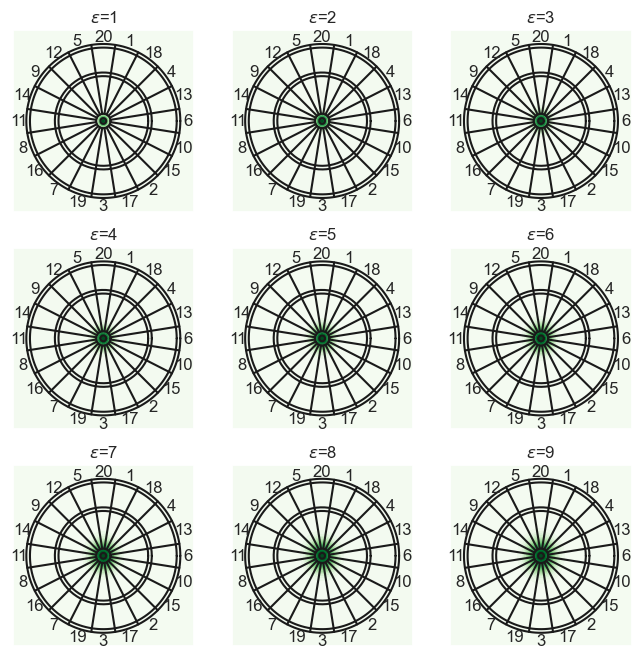

In [2]:
cmap = 'Wistia'

x_val=0
y_val=0

epsilon_list = [1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(3, 3, figsize=(8,8))

for e in range(len(epsilon_list)):
    row = math.floor(e/3)
    col = e % 3
    plot_gaussian(x_val,y_val,epsilon_list[e],player_index=10,xlim=(-200,200),ylim=(-200,200),ax=ax[row,col],title='$\epsilon$={}'.format(epsilon_list[e]))
    #plt.tight_layout()

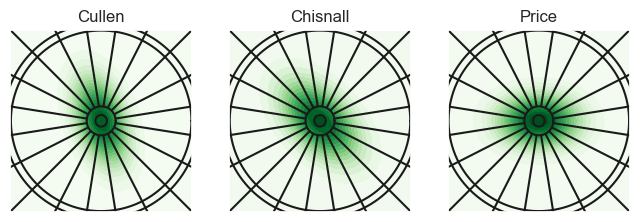

In [58]:
cmap = 'Wistia'

x_val=0
y_val=0

player_list = [5,2,9]
names = ['Cullen','Chisnall','Price']

fig, ax = plt.subplots(1, 3, figsize=(8,8))

for p in range(len(player_list)):
    row = 0
    col = p % 3
    plot_gaussian(x_val,y_val,10,player_index=player_list[p],xlim=(-100,100),ylim=(-100,100),ax=ax[col],title=names[p])
    #plt.tight_layout()

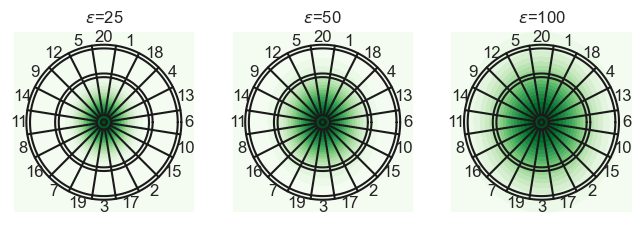

In [60]:
cmap = 'Wistia'

x_val=0
y_val=0

epsilon_list = [25,50,100]

fig, ax = plt.subplots(1, 3, figsize=(8,8))

for e in range(len(epsilon_list)):
    row = 0
    col = e % 3
    plot_gaussian(x_val,y_val,epsilon_list[e],player_index=10,xlim=(-200,200),ylim=(-200,200),ax=ax[col],title='$\epsilon$={}'.format(epsilon_list[e]))
    #plt.tight_layout()

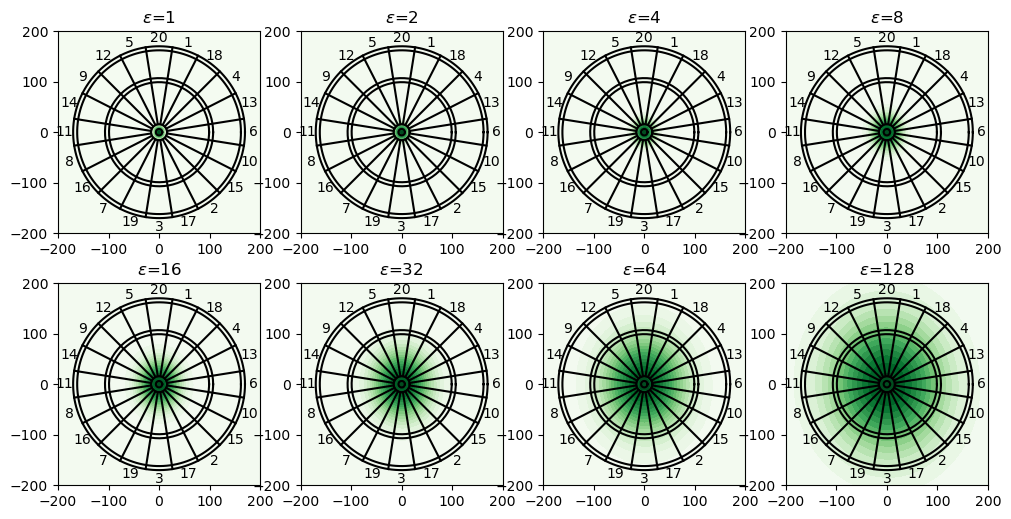

In [23]:

x_val=0
y_val=0

epsilon_list = [1,2,4,8,16,32,64,128]
fig, ax = plt.subplots(2, 4,figsize=(12,6))

for e in range(len(epsilon_list)):
    row = 0 if e <4 else 1
    col = e % 4 
    plot_gaussian(x_val,y_val,epsilon_list[e],player_index=10,xlim=(-200,200),ylim=(-200,200),ax=ax[row,col],title='$\epsilon$={}'.format(epsilon_list[e]))
    

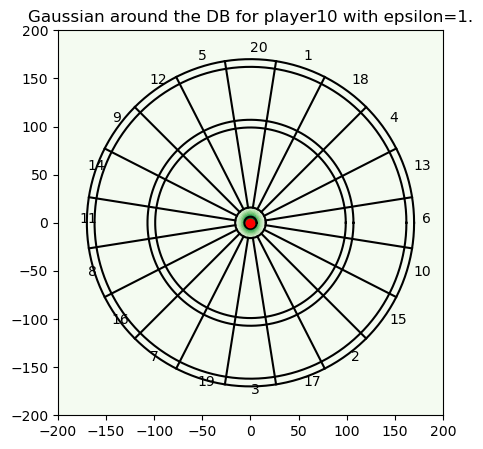

In [9]:
x_val = 0
y_val= 0

epsilon =1

fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))
fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

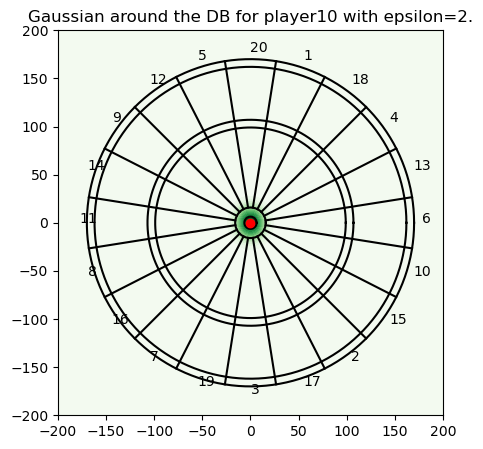

In [10]:
x_val = 0
y_val= 0

epsilon =2
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

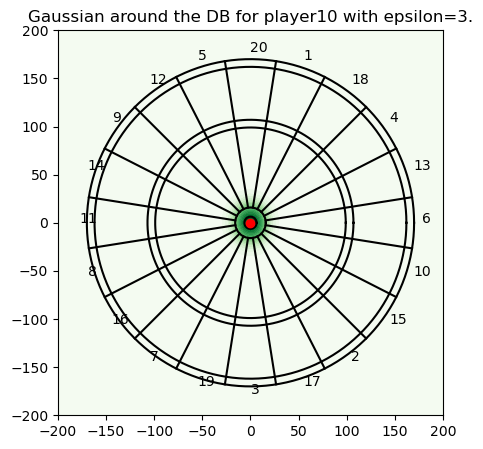

In [11]:
x_val = 0
y_val= 0

epsilon =3
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

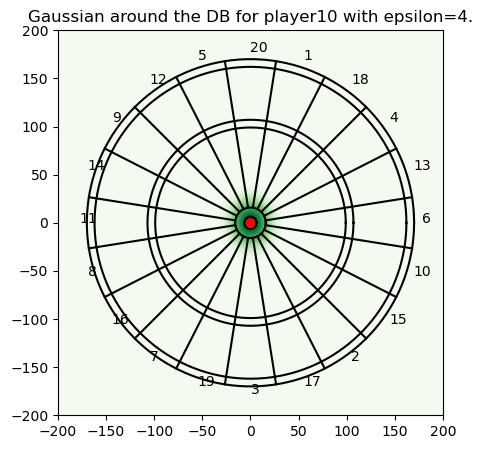

In [12]:
x_val = 0
y_val= 0

epsilon =4
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

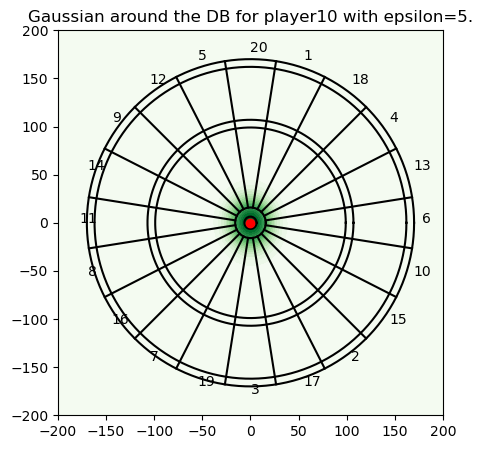

In [13]:
x_val = 0
y_val= 0

epsilon =5
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

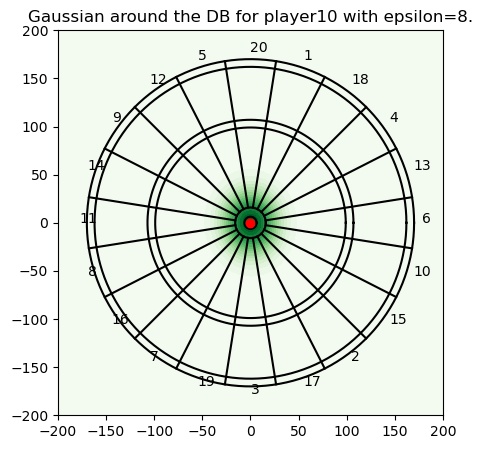

In [14]:
x_val = 0
y_val= 0

epsilon =8
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

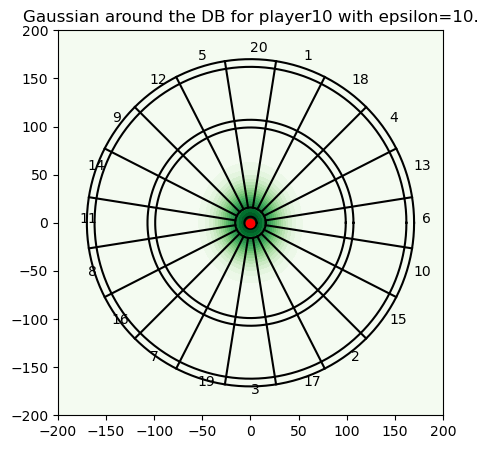

In [16]:
x_val = 0
y_val= 0

epsilon =10
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

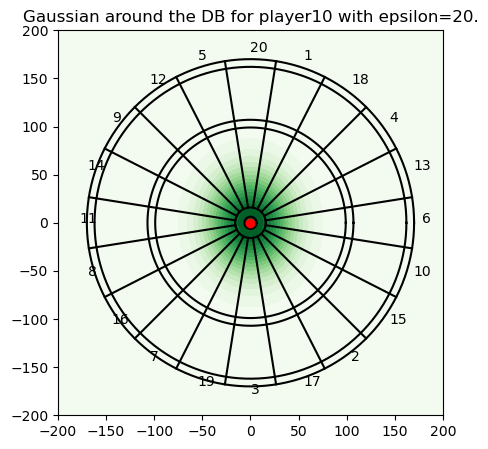

In [15]:
x_val = 0
y_val= 0

epsilon =20
fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=10,figsize = (5,5))

fig = plt.title(f'Gaussian around the DB for player10 with epsilon={epsilon}.')

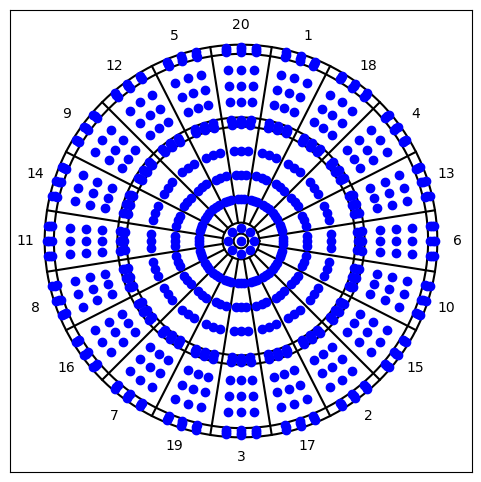

In [4]:
axes = ib.plot_basic_board(figsize = (6,6))

figure = plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

for a in imdp.a_throw_list:

    coords = imdp.actions[a]['coords']
    x = coords[0]
    y = coords[1]

    axes.plot( x , y , "ob")

#figure = plt.title("Set of Action Throw Targets Considered for MDP")


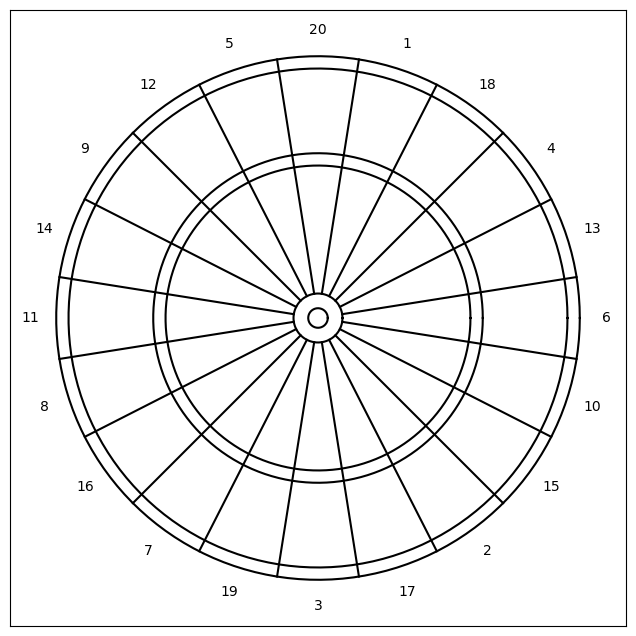

In [2]:
ax = ib.plot_basic_board()